<h1>Extracting Stock Data Using a Python Library</h1>


<p>I will hypothetically work as a data analyst for a hedge fund; my job is to determine any suspicious stock activity. I will extract stock data using a Python library. I will use the <coode>yfinance</code> library, it allows us to extract data for stocks returning data in a pandas dataframe.</p>


In [1]:
# !pip install yfinance==0.1.67
#!pip install pandas==1.3.3

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Using the yfinance Library to Extract Stock Data


I will use the Ticker module and create an object that will allow me to access functions to extract data. 

In [2]:
game = yf.Ticker("GME")

In [3]:
game_info=game.info
game_info

{'zip': '76051',
 'sector': 'Consumer Cyclical',
 'fullTimeEmployees': 12000,
 'longBusinessSummary': 'GameStop Corp., a specialty retailer, provides games and entertainment products through its e-commerce properties and various stores in the United States, Canada, Australia, and Europe. The company sells new and pre-owned gaming platforms; accessories, such as controllers, gaming headsets, virtual reality products, and memory cards; new and pre-owned gaming software; and in-game digital currency, digital downloadable content, and full-game downloads. It also sells collectibles comprising licensed merchandise primarily related to the gaming, television, and movie industries, as well as pop culture themes. As of January 29, 2022, the company operated 4,573 stores and ecommerce sites under the GameStop, EB Games, and Micromania brands; and 50 pop culture themed stores that sell collectibles, apparel, gadgets, electronics, toys, and other retail products under the Zing Pop Culture brand, 

I can get the any values from this dictionary using the key:


In [4]:
game_info['averageVolume']

4565768

### Extracting Share Price


I will use the history() method to get the share price of the stock over a certain period of time. 

Specifing the period parameter I can set how far back from the present to get data (the options for period are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max)


Then the format that the data is returned in is a Pandas DataFrame. 

In [5]:
game_share_price_data = game.history(period="max")
game_share_price_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-02 00:00:00-05:00,26.250000,27.870001,26.110001,27.520000,4568900,0.0,0.0
2022-12-05 00:00:00-05:00,27.309999,27.480000,25.440001,25.559999,4973700,0.0,0.0
2022-12-06 00:00:00-05:00,25.410000,25.580000,23.110001,23.389999,7699300,0.0,0.0


I can also set a different period:

In [6]:
game_share_price_data_1month = game.history(period="1mo")
game_share_price_data_1month.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-11-09 00:00:00-05:00,24.549999,24.670000,21.889999,23.110001,8464800,0,0
2022-11-10 00:00:00-05:00,24.620001,25.700001,23.910000,24.879999,6107000,0,0
2022-11-11 00:00:00-05:00,24.780001,26.120001,24.150000,26.100000,3986200,0,0
2022-11-14 00:00:00-05:00,26.299999,27.379999,25.610001,26.049999,4352200,0,0
2022-11-15 00:00:00-05:00,26.590000,28.240000,26.270000,27.590000,5392000,0,0


I will go on with the max period:


In [7]:
game_share_price_data.reset_index(inplace=True)

I will plot the Open price against the Date:


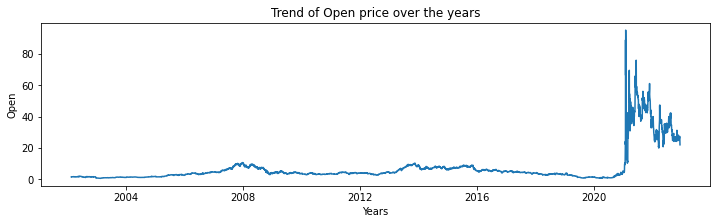

In [8]:
fig, axes = plt.subplots(figsize=(12,3)) 

# Now use the axes object to add stuff to plot
axes.plot(game_share_price_data["Date"], game_share_price_data["Open"])
axes.set_xlabel('Years')
axes.set_ylabel('Open')
axes.set_title('Trend of Open price over the years');


### Extracting CashFlow


In [9]:
game_cashflow=game.cashflow.T
game_cashflow

,Change To Liabilities,Total Cashflows From Investing Activities,Net Borrowings,Total Cash From Financing Activities,Change To Operating Activities,Issuance Of Stock,Net Income,Change In Cash,Effect Of Exchange Rate,Total Cash From Operating Activities,Depreciation,Other Cashflows From Investing Activities,Change To Inventory,Change To Account Receivables,Other Cashflows From Financing Activities,Change To Netincome,Capital Expenditures,Dividends Paid,Repurchase Of Stock
,,,,,,,,,,,,,,,,,,,
2022-01-29,224400000.0,-64800000.0,-332400000.0,1.200600e+09,-5900000.0,1.672800e+09,-381300000.0,6.849000e+08,-16600000.0,-434300000.0,77200000.0,-2800000.0,-329600000.0,-38400000.0,-139800000.0,41000000.0,-62000000.0,NaN,NaN
2021-01-30,-78600000.0,36900000.0,-58200000.0,-5.540000e+07,24400000.0,3.100000e+06,-215300000.0,1.215000e+08,16300000.0,123700000.0,80700000.0,1400000.0,282400000.0,39800000.0,-139800000.0,77300000.0,-60000000.0,-300000.0,NaN
2020-02-01,-792800000.0,-60900000.0,-404500000.0,-6.447000e+08,7700000.0,3.100000e+06,-470900000.0,-1.127000e+09,-6900000.0,-414500000.0,96200000.0,12400000.0,361100000.0,-10900000.0,-1000000.0,471000000.0,-78500000.0,-40500000.0,-198700000.0
2019-02-02,-26000000.0,635500000.0,-12200000.0,-1.747000e+08,7100000.0,3.100000e+06,-673000000.0,7.714000e+08,-24700000.0,325100000.0,106800000.0,1300000.0,12600000.0,-34400000.0,-1000000.0,950700000.0,-93700000.0,-157400000.0,-5100000.0


I will plot the dividends overtime:


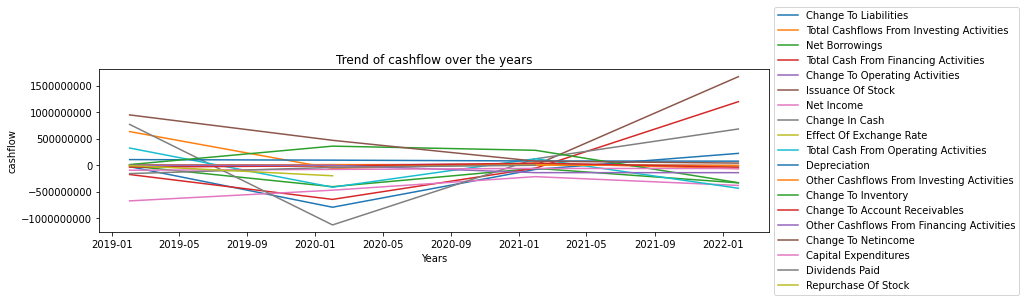

In [10]:
fig, axes = plt.subplots(figsize=(12,3)) 


axes.plot(game_cashflow)
axes.set_xlabel('Years')
axes.set_ylabel('cashflow')
axes.set_title('Trend of cashflow over the years');
axes.legend(game_cashflow, loc='center left', bbox_to_anchor=(1.0, 0.5)) 
axes.ticklabel_format(style='plain', axis='y')